# Proyek Analisis Data: Bike Sharing Dataset 
Nama: I Kadek Adi Memes Subagia <br>
Email: adimemes06@gmail.com <br>
ID Dicoding: I Kadek Adi Memes Subagia <br>

# Menentukan Pertanyaan Bisnis

<ol>
    <li>bagaimana peningkatan jumlah register sepeda setiap bulannya</li>
    <li>perbandingan jumlah register Holiday, workingday, dan weekday</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
bike_day_df = pd.read_csv("day.csv")
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assessing Data


In [3]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("berapa nilai duplikat", bike_day_df.duplicated().sum() )

berapa nilai duplikat 0


In [6]:
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Analisa Data
<ol>
    <li>Terdapat kesalahan pada penggunaan tipe data yang berada pada data set Day</li>
</ol>

## Cleaning Data

In [7]:
datetime_column = ["dteday"]

for colums in datetime_column:
    bike_day_df[colums] = pd.to_datetime(bike_day_df[colums])

In [8]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

# Exploratory Data Analysis (EDA)

<ol>
    <li>jumlah data lengkap user yang register pada working day</li>
    <li>data lengkap mengenai waktu berapa user register sepeda di working day</li>
</ol>

In [9]:
bike_day_df["registered"].describe(include = "all") 
bike_day_df.groupby(by="registered").agg({
    "registered": "sum",
    "workingday": ["max", "min", "mean", "std"]
})

registered workingday             
                  sum        max min mean std
registered                                   
20                 20          1   1  1.0 NaN
416               416          1   1  1.0 NaN
432               432          1   1  1.0 NaN
451               451          0   0  0.0 NaN
472               472          1   1  1.0 NaN
...               ...        ...  ..  ...  ..
6844             6844          1   1  1.0 NaN
6898             6898          1   1  1.0 NaN
6911             6911          1   1  1.0 NaN
6917             6917          1   1  1.0 NaN
6946             6946          1   1  1.0 NaN

[679 rows x 5 columns]

In [10]:
bike_day_df.groupby(by="dteday").agg({
    "workingday": ["max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

workingday                cnt            
                  max min mean std   sum    mean std
dteday                                              
2011-01-01          0   0  0.0 NaN   985   985.0 NaN
2011-01-02          0   0  0.0 NaN   801   801.0 NaN
2011-01-03          1   1  1.0 NaN  1349  1349.0 NaN
2011-01-04          1   1  1.0 NaN  1562  1562.0 NaN
2011-01-05          1   1  1.0 NaN  1600  1600.0 NaN
...               ...  ..  ...  ..   ...     ...  ..
2012-12-27          1   1  1.0 NaN  2114  2114.0 NaN
2012-12-28          1   1  1.0 NaN  3095  3095.0 NaN
2012-12-29          0   0  0.0 NaN  1341  1341.0 NaN
2012-12-30          0   0  0.0 NaN  1796  1796.0 NaN
2012-12-31          1   1  1.0 NaN  2729  2729.0 NaN

[731 rows x 7 columns]

# Visualization & Explanatory Analysis

<li>bagaimana peningkatan jumlah register sepeda setiap bulannya</li>

In [11]:
monthly_orders_df = bike_day_df.resample(rule='M', on='dteday').agg({
    "registered": "sum", 
    "cnt": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "registered": "total_registered", 
    "cnt": "total_cnt"                 
}, inplace=True)

# Tampilkan hasil akhir
monthly_orders_df.head()


C:\Users\ACER\AppData\Local\Temp\ipykernel_20052\1524451256.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = bike_day_df.resample(rule='M', on='dteday').agg({


,dteday,total_registered,total_cnt
0,2011-01,35116,38189
1,2011-02,41973,48215
2,2011-03,51219,64045
3,2011-04,72524,94870
4,2011-05,104771,135821


C:\Users\ACER\AppData\Local\Temp\ipykernel_20052\1179963293.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = bike_day_df.resample(rule='M', on='dteday').agg({


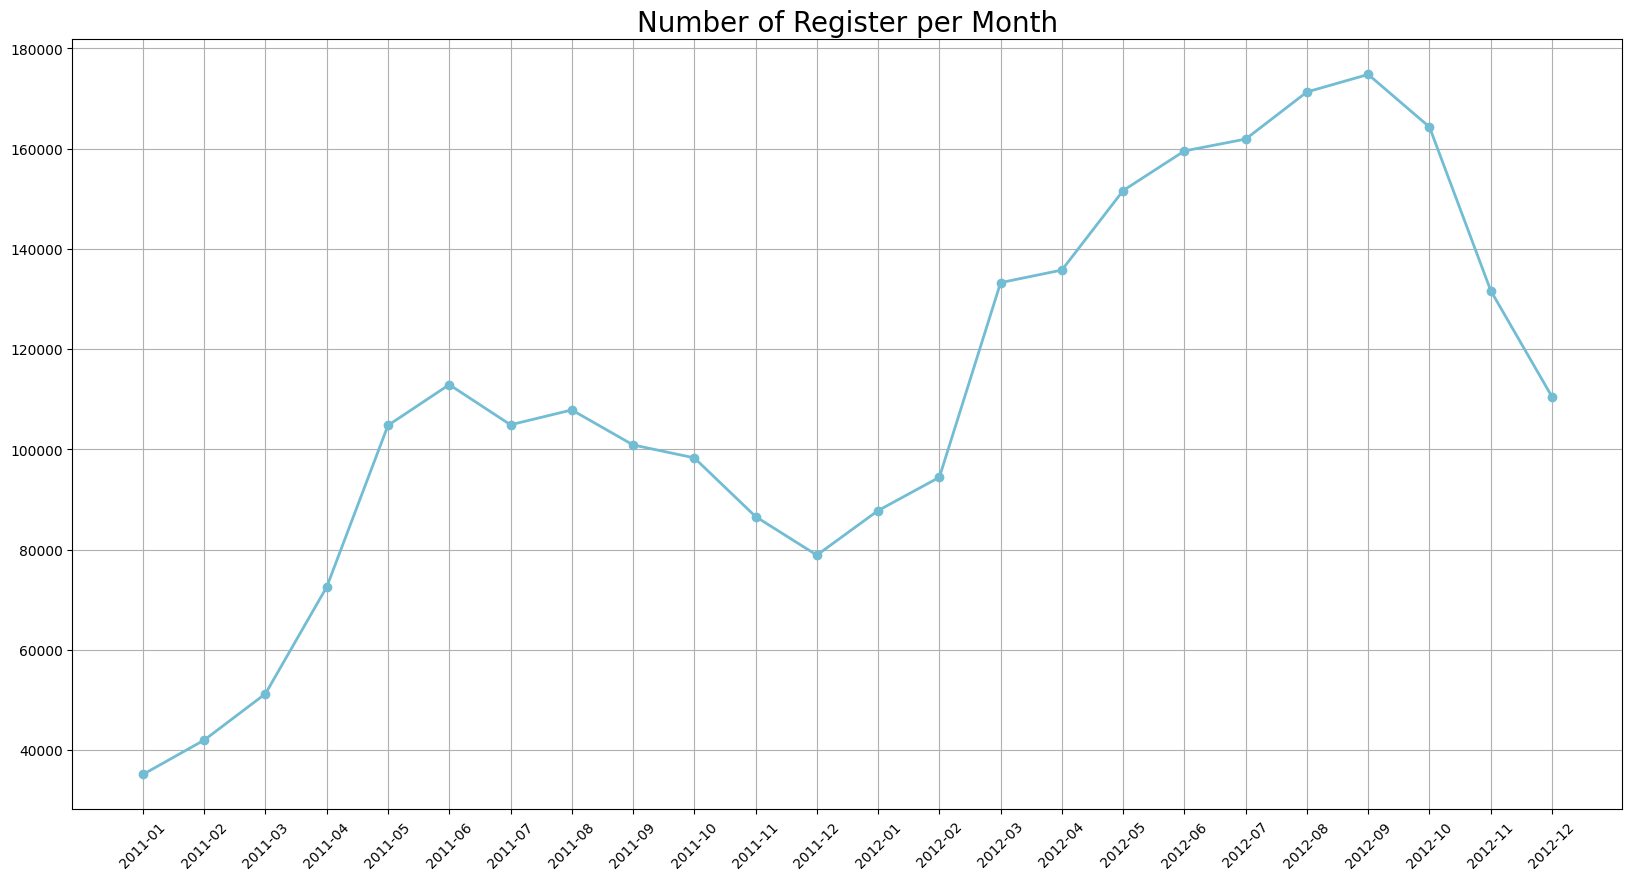

In [12]:
monthly_orders_df = bike_day_df.resample(rule='M', on='dteday').agg({
    "registered": "sum", 
    "cnt": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "registered": "total_registered", 
    "cnt": "total_cnt"                 
}, inplace=True)

monthly_orders_df.head()

plt.figure(figsize=(20, 10)) 
plt.plot(monthly_orders_df["dteday"], monthly_orders_df["total_registered"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Register per Month", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.grid(True)
plt.xticks(rotation = 45)
plt.yticks(fontsize=10) 
plt.show()

<li>perbandingan jumlah register Holiday, workingday, dan weekday</li>

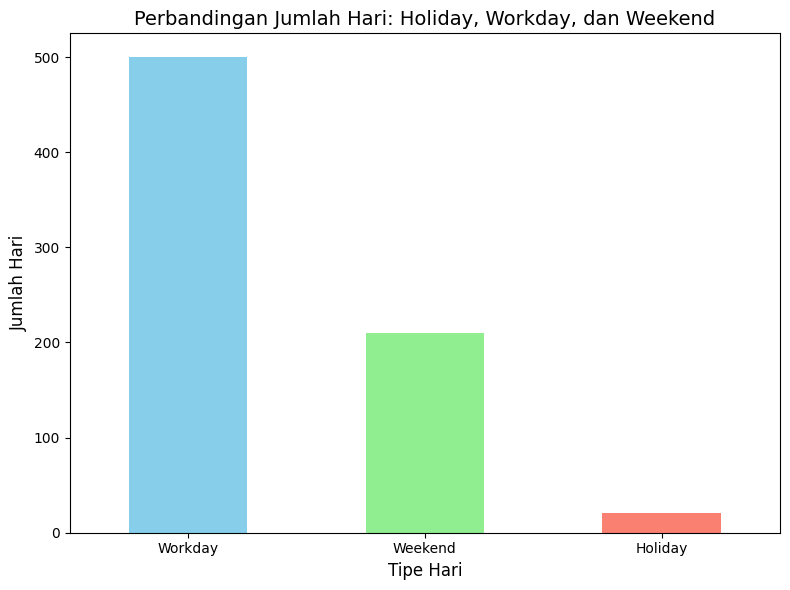

In [13]:
bike_day_df['day_type'] = bike_day_df.apply(lambda row: 'Holiday' if row['holiday'] == 1 
                              else ('Workday' if row['workingday'] == 1 
                              else 'Weekend'), axis=1)

day_type_counts = bike_day_df['day_type'].value_counts()

plt.figure(figsize=(8, 6))
day_type_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Perbandingan Jumlah Hari: Holiday, Workday, dan Weekend', fontsize=14)
plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Jumlah Hari', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Conclusion

<ol>
    <li>bagaimana peningkatan jumlah register sepeda setiap bulannya</li>
    <p>Bisa dilihat dari grafik yang sudah dibuat menggunakan line chart, bahwa terjadinya tren naik yang seknifikan setiap bulannya puncaknya adalah bulan 9 tahun 2021</p>
    <li>perbandingan jumlah register Holiday, workingday, dan weekday</li>
    <p>dilihat dari bar chart yang ada bahwa user lebih banyak menyewa sepeda pada hari kerja daripada di hari weekend dan holiday, sehingga bisa disimpulkan penjualan paling keras pada workday dimana user mungkin saja menyewa sepeda untuk ke tempat bekerja</p>
</ol>